In [1]:
import os
import numpy as np
import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import pytz
from datetime import datetime
import seaborn as sns

pst_tz = pytz.timezone('America/Los_Angeles')


# Question 27-28

In [2]:
def report_statistics(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        total_tweets = len(lines)
        citation_date   = []
        followers  = []
        retweets   = []

        for line in lines:
            tweet = json.loads(line)
            citation_date.append(datetime.fromtimestamp(tweet['citation_date'], pst_tz))
            followers.append(tweet['author']['followers'])
            retweets.append(tweet['metrics']['citations']['total'])
            
        df = pd.DataFrame(citation_date, columns=['time']).set_index('time')
        tweets_by_hour = df.groupby(pd.Grouper(freq='60Min'))
        count_by_hour = [len(val) for key, val in tweets_by_hour]
        total_hours = len(tweets_by_hour)
            
        print('Filename:', filename[12:]) 
        print("Average number of tweets per hour:", len(citation_date) / total_hours)
        print("Average number of followers of users posting the tweets per tweet: ", np.mean(followers))
        print("Average number of retweets per tweet: ", np.mean(retweets))
        print("Tweetcounts: ", total_tweets)
        print("First time of Tweet: ", min(citation_date))
        print("Last  time of Tweet: ", max(citation_date))
        print('-' * 265)

In [3]:
files = ['tweets_data/tweets_#gohawks.txt', 'tweets_data/tweets_#gopatriots.txt', 
         'tweets_data/tweets_#nfl.txt', 'tweets_data/tweets_#patriots.txt', 
         'tweets_data/tweets_#sb49.txt', 'tweets_data/tweets_#superbowl.txt']

hashtags = ["gohawks", "gopatriots", "nfl", "patriots", "sb49", "superbowl"]

# files = ['tweets_data/tweets_#gohawks.txt', 'tweets_data/tweets_#gopatriots.txt']
# hashtags = ["gohawks", "gopatriots"]

for file in files:
    report_statistics(file)

Filename: tweets_#gohawks.txt
Average number of tweets per hour: 292.09326424870466
Average number of followers of users posting the tweets per tweet:  2217.9237355281984
Average number of retweets per tweet:  2.0132093991319877
Tweetcounts:  169122
First time of Tweet:  2015-01-14 00:04:41-08:00
Last  time of Tweet:  2015-02-07 02:17:49-08:00
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Filename: tweets_#gopatriots.txt
Average number of tweets per hour: 40.888695652173915
Average number of followers of users posting the tweets per tweet:  1427.2526051635405
Average number of retweets per tweet:  1.4081919101697078
Tweetcounts:  23511
First time of Tweet:  2015-01-14 01:50:11-08:00
Last  time of Tweet:  2015-02-06 23:54:35-08:00
----------------------------------------

In [4]:
def plot_count(filename, hashtag):
    with open(filename, 'r') as file:
        lines = file.readlines()
        total_tweets = len(lines)
        citation_date   = []

        for line in lines:
            tweet = json.loads(line)
            citation_date.append(datetime.fromtimestamp(tweet['citation_date'], pst_tz))
            
        df = pd.DataFrame(citation_date, columns=['time']).set_index('time')
        tweets_by_hour = df.groupby(pd.Grouper(freq='60Min'))
        count_by_hour = [len(val) for key, val in tweets_by_hour]
        

    plt.style.use('dark_background')
    plt.figure(figsize=(10,4))
    plt.grid(zorder=0)
    plt.bar(range(len(tweets_by_hour.groups.keys())), count_by_hour,width=1,color = 'r',align='center')
    plt.xlabel('Hour',fontsize=20)
    plt.ylabel('# of tweets',fontsize=20)
    plt.title('# of tweets per hour' + ' ' + hashtag, fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()


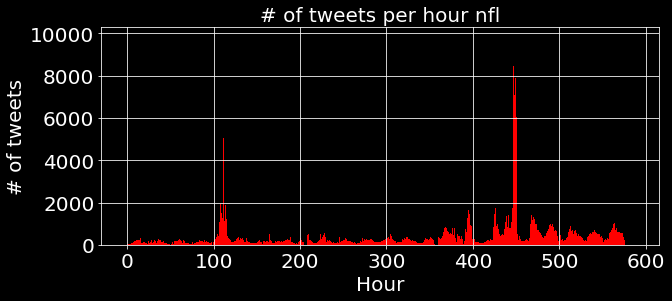

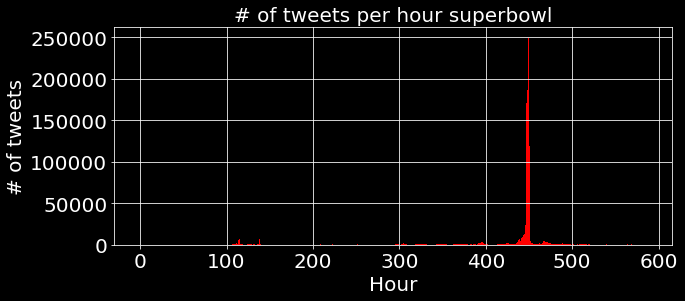

In [5]:
fileslist = ['tweets_data/tweets_#nfl.txt', 'tweets_data/tweets_#superbowl.txt']
hashtaglist = ["nfl", "superbowl"]

plot_count(fileslist[0], hashtaglist[0])
plot_count(fileslist[1],hashtaglist[1])

# Question 29